In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [9]:
make_blobs?

In [36]:
X, Y = make_blobs(n_samples=400, n_features=2,center_box=(-2,2),centers=2,shuffle=True, random_state=11)

In [37]:
# Visulasize


print(X.shape)
print(Y.shape)

(400, 2)
(400,)


In [38]:
print(X[:5,:])

[[-0.5916089  -3.74510862]
 [-1.32689635 -0.69386718]
 [-2.07178625 -1.99384845]
 [ 0.62073036  1.98661246]
 [ 0.72940855 -0.69395833]]


In [39]:
print(Y[:5])

[0 1 0 1 1]


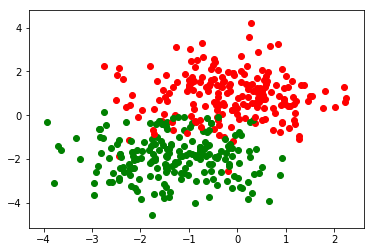

In [40]:
for i in range(X.shape[0]):
    if Y[i]==1:
        plt.scatter(X[i][0],X[i][1],c='r')
    else:
        plt.scatter(X[i][0],X[i][1],c='g')
        
plt.show()

In [44]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

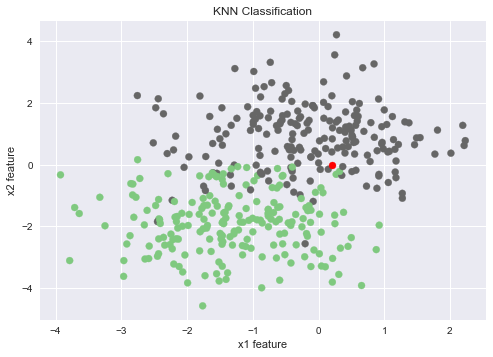

In [72]:
query_x = np.array([0.2,0.0])


plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.scatter(query_x[0],query_x[1],c='red')
plt.title("KNN Classification")
plt.xlabel("x1 feature")
plt.ylabel("x2 feature")
plt.show()



In [75]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [112]:
def knn(X,Y,query_x,k=5):
    
    m = X.shape[0]
    
    d_list = []
    
    for i in range(m):
        
        d = distance(X[i],query_x)
        d_list.append((d,Y[i]))
        
    d_list = sorted(d_list,reverse=False)
    d_list = np.array(d_list[:k])
    d_list = d_list[:,1]
    freq = np.unique(d_list,return_counts=True) 
    idx = np.argmax(freq[1])
    pred = freq[0][idx]
    
    return int(pred)

In [113]:

knn(X,Y,query_x)

1

In [191]:
# x = np.array([1,1,2,4,4,3,2,1])
# t = np.unique(x,return_counts=True)
# print(t[0])
# print(t[1])

# print(np.max(t[1]))
# print(np.argmax(t[1]))


def predict(X,Y):
    
    all_pred = []
    
    for x in X:
        pred = knn(X,Y,x)
        all_pred.append(pred)
    
    
    all_pred = np.array(all_pred,dtype='int32')
    #print(all_pred)
    return all_pred

In [190]:
pred = predict(X,Y)

KeyboardInterrupt: 

In [ ]:
accuracy = np.sum(Y == pred)/Y.shape[0]
print(accuracy)

## MNIST Dataset

In [175]:
import pandas as pd

In [176]:
df = pd.read_csv("../Datasets/MNIST-2/mnist_train.csv")

In [177]:
print(df.shape)

(42000, 785)


In [178]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [180]:
data = np.array(df)

In [181]:
print(data.shape,type(data))

(42000, 785) <class 'numpy.ndarray'>


In [184]:
X, Y = data[:10000,1:], data[:10000,0]
print(X.shape,Y.shape)

(10000, 784) (10000,)


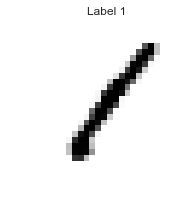

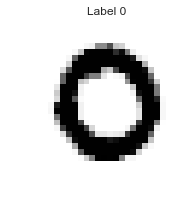

In [185]:
## Visulaise some the examples
def drawImg(sample,Y):
    plt.figure(figsize=(3,3))
    sample = sample.reshape((28,28))
    plt.title("Label "+str(Y))
    plt.imshow(sample)
    plt.axis("off")
    plt.show()
    
for i in range(2):
    drawImg(X[i],Y[i])

In [186]:
# Split your Train and Test Data
split = int(X.shape[0]*.8)
print(split)

8000


In [192]:
X_Train,Y_Train = X[:split,:], Y[:split]
X_Test,Y_Test = X[split:,:], Y[split:]

print(X_Train.shape,Y_Train.shape)
print(X_Test.shape,Y_Test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


In [193]:
from sklearn.model_selection import train_test_split
XT,Xt,YT,Yt = train_test_split(X,Y,test_size=.2,random_state=1)
print(XT.shape,YT.shape)
print(Xt.shape,Yt.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


In [194]:
pred = predict(Xt,Yt)

In [198]:
acc = np.sum(pred==Yt)/Yt.shape[0]
print(acc)

0.937


## SkLearn K-NN Neigbours

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [133]:
classifier.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [139]:
classifier.predict(X)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,